READING THE DATA SET 

In [19]:
#Importing  libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# Loading of the csv file
conn = sqlite3.connect("../data/im.db/im.db")

In [21]:
# Loading of the csv file
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [22]:
# read first 10 rows from a table (change index or name as needed)
table = tables.at[0, 'name']  # e.g. 'movie_basics'
df = pd.read_sql(f'SELECT * FROM "{table}" LIMIT 10;', conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [23]:
table = tables.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    8 non-null      object
dtypes: object(1)
memory usage: 196.0+ bytes


In [24]:
df=pd.read_sql_query('''SELECT *
                  FROM movie_ratings;''',conn)
df.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
df= pd.read_sql_query('''SELECT *
                  FROM known_for;''',conn)
df=df.head()
df

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [26]:
pd.read_sql_query('''SELECT *
                  FROM movie_akas;''',conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [27]:
pd.read_sql_query('''SELECT *
                  FROM principals;''',conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [28]:
pd.read_sql_query('''SELECT *
                  FROM directors;''',conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [29]:
pd.read_sql_query('''SELECT *
                  FROM writers;''',conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [30]:
pd.read_sql_query('''SELECT *
                  FROM movie_basics;''',conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [75]:
im_db.shape

(146144, 6)

In [76]:
im_db.duplicated().sum()

0

In [33]:

# Loading the Box Office Mojo dataset
bom = pd.read_csv("../data/bom.movie_gross.csv.gz", compression='gzip')
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [34]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [35]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [36]:
bom.dropna()#Remove rows with missing values

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [37]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [38]:
display(bom.isnull().sum())#count nulls

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [39]:
# replace missing studios with unknown
bom['studio'] = bom['studio'].fillna('Unknown')


In [40]:
bom.isnull().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [41]:
bom.shape

(3387, 5)

In [42]:
#Handling missing domestic_gross
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)


In [43]:
# Clean foreign_gross strings (remove $ and commas), convert to numeric, then fill missing with median
bom['foreign_gross'] = bom['foreign_gross'].replace('[\$,]', '', regex=True).replace('', np.nan)
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

median_foreign_gross = bom['foreign_gross'].median()
bom['foreign_gross'] = bom['foreign_gross'].fillna(median_foreign_gross)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\PC\AppData\Local\Temp\ipykernel_18552\2334353697.py:2: SyntaxWarning: invalid escape sequence '\$'
  bom['foreign_gross'] = bom['foreign_gross'].replace('[\$,]', '', regex=True).replace('', np.nan)


In [44]:
# Handling missing foreign_gross
bom['foreign_gross'] = (
    bom['foreign_gross']
    .replace('[\$,]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)



<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\PC\AppData\Local\Temp\ipykernel_18552\2871705083.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [45]:
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [46]:
#Quick sample rows with nulls
display(bom[bom.isnull().any(axis=1)].head())

,title,studio,domestic_gross,foreign_gross,year


In [47]:
#Duplicates
bom.duplicated().sum()

0

In [48]:
bom_clean = bom.copy()

In [49]:
bom_clean.to_csv("cleaned-bom.movies.csv", index=False)

In [50]:

#2. Loading budgets and grosses
tn = pd.read_csv("../data/tn.movie_budgets.csv.gz", compression='gzip')
tn.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [51]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [52]:
tn.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [53]:
tn.describe

<bound method NDFrame.describe of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1

In [54]:
tn.shape

(5782, 6)

In [55]:
# loading the cleaned dataset
tn_movies = pd.read_csv("../Notebooks\cleaned-tn.movies_budgets.csv")
tn_movies.head()



<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\PC\AppData\Local\Temp\ipykernel_18552\4220342308.py:2: SyntaxWarning: invalid escape sequence '\c'
  tn_movies = pd.read_csv("../Notebooks\cleaned-tn.movies_budgets.csv")


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",dark phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [56]:
#loading the cleaned bom dataset
bom_clean=pd.read_csv("../Notebooks\cleaned-bom.movies.csv")
bom_clean.head()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\PC\AppData\Local\Temp\ipykernel_18552\1601260605.py:2: SyntaxWarning: invalid escape sequence '\c'
  bom_clean=pd.read_csv("../Notebooks\cleaned-bom.movies.csv")


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [57]:

# Merging using movie title as the key tn_movies and im.db datasets
# load the cleaned datasets
tn = pd.read_csv ("../Notebooks/tn.movie_budgets.csv")
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [58]:
#Removing dollar signs ($) and commas (,) from money columns,
#Converting them from text to numbers (float type)
for col in ["production_budget", "domestic_gross", "worldwide_gross"]:
    tn[col] = (
        tn[col]
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

In [59]:
# Profit = worldwide gross - production budget
tn["profit"] = tn["worldwide_gross"] - tn["production_budget"]

In [60]:
tn.shape

(5782, 7)

In [61]:
#connecting to the im.db database
conn = sqlite3.connect("../data/im.db/im.db")

In [62]:
#load data from im.db
im_db = pd.read_sql_query('''SELECT *
                  FROM movie_basics;''',conn)

In [63]:
movie_basics =pd.read_sql_query('''SELECT primary_title, start_year, genres
                  FROM movie_basics;
                  ''', conn)

In [64]:
#checking  the columns of both datasets
tn.columns, im_db.columns

(Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
        'worldwide_gross', 'profit'],
       dtype='object'),
 Index(['movie_id', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'))

In [65]:
# Mergeing the dataset using movie title 
merged = pd.merge(tn,
                  movie_basics,
                  left_on= 'movie',#column in tn_movies
                  right_on= 'primary_title',# column in im.db
                  how= 'inner') #keep only matches in both datasets 


In [66]:
merged.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,primary_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,Avatar,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


In [67]:
merged.shape

(3815, 10)

In [68]:
im_db.info 

<bound method DataFrame.info of          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad

# Objective 1: Which genres are the most expensive to produce ?

In this analysis, we aim to determine which **movie genres** have the **highest average production budgets** using our merged movie dataset.  
By understanding which genres are the most expensive, film studios can better plan their production investments.

# Step1:Load  the Merged Dataset
We begin by loading the merged dataset that contains both **genre** and **production budget** information.  

In [69]:
# STEP 1: Prepare the data
df_genre = merged[['production_budget', 'genres']].dropna(subset=['genres', 'production_budget'])

### Step 2: Split Multi-Genre Entries
Some movies in our dataset belong to **multiple genres** — for example, a movie might be listed as `"Action, Adventure"` or `"Comedy, Drama"`.  
If we leave them combined, each multi-genre movie will only count toward one category, which would **distort the averages** when calculating production budgets per genre.

To fix this, we split these combined genres into **separate rows**, ensuring each genre is analyzed individually.


In [70]:
# STEP 2: Split multi-genre entries
df_genre['genres'] = df_genre['genres'].str.split(',')# Split the genre string into a list
df_genre = df_genre.explode('genres')                 #create a new row for each genre
df_genre['genres'] = df_genre['genres'].str.strip()   #Remove extra spaces around genre names

## Step 3:Calculate Average and Count per Genre
since each genre is separated into its own row, we can calculate how expensive each genre is to produce on average.  
We’ll do this by grouping the dataset by **genre** and computing two key metrics:

- The **count** → how many movies belong to that genre.  
- The **mean** → the average production budget for that genre.

In [71]:
# STEP 3: Calculate average and count per genre
genre_stats = (
    df_genre
    .groupby('genres')['production_budget'] #Groups all movies by genre focusing on production budget column.
    .agg(['count', 'mean'])   # Create two columns: count and mean
    .reset_index() #converts the grouped data back into a regular DataFrame
    .sort_values('mean', ascending=False)#sorting from most expensive to least expensive
)

## Step 4: Filtering of genres with very few Movies 

In this step, we make sure our results are fair.
Some genres might look expensive only because they have a few movies.
To fix this, we only keep genres that have 20 or more movies.

After that, we pick the top 15 genres with the highest average production cost.
This helps us see which genres are truly the most expensive to make.

In [72]:
# STEP 4: Filter out genres with very few movies
min_count = 20
top_by_mean = genre_stats[genre_stats['count'] >= min_count].head(15)

print("Top 15 Most Expensive Genres (by Average Production Budget):")
display(top_by_mean)


Top 15 Most Expensive Genres (by Average Production Budget):


,genres,count,mean
1,Adventure,490,8.722477e+07
2,Animation,148,8.039302e+07
9,Fantasy,202,6.591755e+07
18,Sci-Fi,229,6.428107e+07
0,Action,710,6.211357e+07
8,Family,204,4.708113e+07
13,Musical,35,3.939112e+07
22,Western,25,3.738200e+07
10,History,96,3.337667e+07
4,Comedy,842,3.303495e+07


## Step 5: Visualization of the Top 10 most expensive genres
Using Seaborn’s bar plot, we visualized the **Top 10 most expensive genres** based on their average production budgets.

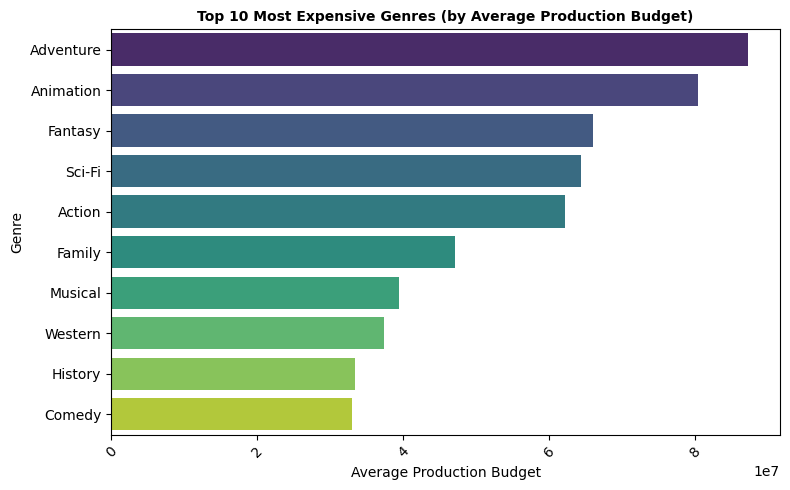

In [77]:
# Visualization — Top 10 most expensive genres
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_by_mean.head(10),
    x='mean',
    y='genres',
    hue='genres',         # Colors each genre
    palette='viridis',
    dodge=False,          # Keeps bars aligned
)

plt.title('Top 10 Most Expensive Genres (by Average Production Budget)', fontsize=10, weight='bold')
plt.xlabel('Average Production Budget')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Key Insights from the Visualization
- Genres like **Adventure**, **Animation**, **Fantasy**, **Action**, and **Sci-Fi** have the **highest average production budgets**.  
- These genres typically require **advanced visual effects**, **large-scale production crews**, and **high-end set designs**, which drive up costs significantly.  
- Conversely, genres such as **History** and **Comedy** tend to have **lower budgets**, often due to simpler production needs and fewer technical demands.  


### Conclusion
From our analysis, **Action**, **Adventure**, and **Science Fiction** films stand out as the **most expensive to produce**.  
This indicates that studios choosing these genres must be ready for **heavy financial investment upfront**, but they also have the **potential for massive box-office payoffs** if executed successfully.  
  *big budgets don’t guarantee big profits.* A smart studio balances creativity with cost efficiency. Think like a data-driven producer, not just a movie fan.

## Bussiness Recomendation Based on Most Expensive Genres:

Adventure, Sci-Fi, Fantasy, and Animation movies cost the most to make. Studios should plan bigger budgets for these, but also make some lower-cost movies to reduce risk.